In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
min_max=MinMaxScaler()

In [ ]:
# For Kaggle Test to get final values
from sklearn.neighbors import KNeighborsClassifier
X=pd.read_csv('data/X_train.csv')
y=pd.read_csv('data/Y_train.csv')
kaggleTest =pd.read_csv('data/X_test.csv')

X_traink, X_testk, Y_traink, Y_testk = train_test_split(
    X, y, test_size=0.0, random_state=42)

le=LabelEncoder()
for col in X_testk.columns.values:
    if X_testk[col].dtypes=='object':
        data=X_traink[col].append(X_testk[col])
        le.fit(data.values)
        X_traink[col]=le.transform(X_traink[col])
        X_testk[col]=le.transform(X_testk[col])

for col in kaggleTest.columns.values:
    if kaggleTest[col].dtypes=='object':
        data=kaggleTest[col].append(X_testk[col])
        le.fit(data.values)
        kaggleTest[col]=le.transform(kaggleTest[col])


age  workclass  education  education.num  marital.status  occupation  \
7070    50          2         11              9               4          12   
13010   59          1         12             14               6           9   
6688    43          2          7             12               0           2   
9976    50          1          9             13               0           9   
5175    18          2          1              7               4           0   

       relationship  race  sex  capital.gain  capital.loss  hours.per.week  \
7070              3     4    1             0             0              15   
13010             4     4    0          4787             0              60   
6688              1     4    1             0             0              40   
9976              4     4    0             0             0              50   
5175              3     2    1             0             0              20   

       native.country  
7070               37  
13010              37  
6688               37  
9976               37  
5175               37

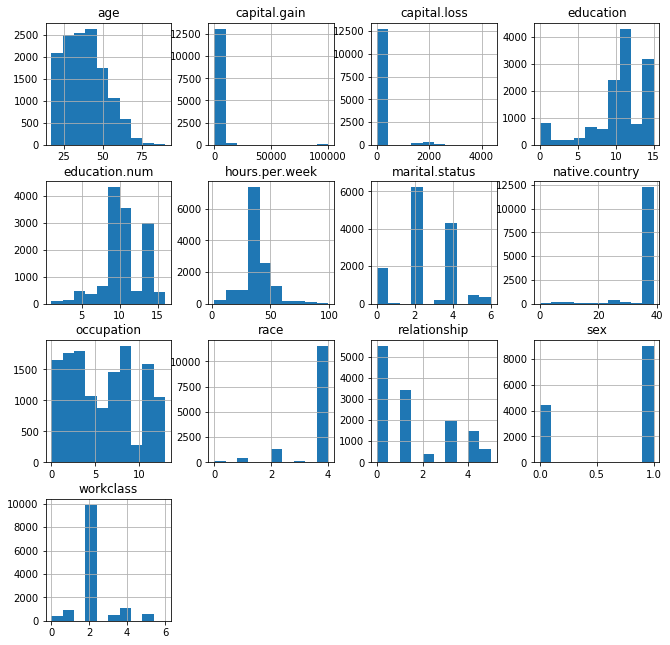

In [4]:
X=pd.read_csv('X_train.csv')
y=pd.read_csv('Y_train.csv')

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

le=LabelEncoder()
for col in X_test.columns.values:
    if X_test[col].dtypes=='object':
        data=X_train[col].append(X_test[col])
        le.fit(data.values)
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])

X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])
        
X_train.head()

[ 99.69 100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.  ]


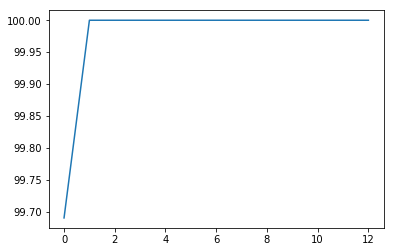

In [5]:
pca = PCA(n_components=13)
pca.fit(X_train)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)

In [6]:
coltoindex = ['age','workclass','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country']

for col in range(13):
    print("Feature ",col,str(coltoindex[col]))

Feature  0 age
Feature  1 workclass
Feature  2 education
Feature  3 education.num
Feature  4 marital.status
Feature  5 occupation
Feature  6 relationship
Feature  7 race
Feature  8 sex
Feature  9 capital.gain
Feature  10 capital.loss
Feature  11 hours.per.week
Feature  12 native.country
